In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-finish-placement-prediction/train_V2.csv
/kaggle/input/pubg-finish-placement-prediction/test_V2.csv
/kaggle/input/pubg-finish-placement-prediction/sample_submission_V2.csv


# 1. 데이터 불러오기

In [6]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 데이터 불러오기
train_data = pd.read_csv("/kaggle/input/pubg-finish-placement-prediction/train_V2.csv")
train_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


# 2. EDA

### 기본 정보, 기술 통계량 확인

In [8]:
train_data.shape

(4446966, 29)

In [9]:
train_data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [11]:
# 컬럼별 결측치 개수 확인
train_data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

### (2) 데이터 샘플링

In [12]:
# 시스템 샘플링의 간격 설정, 예를 들어 10
k = 10
index = np.arange(0, len(train_data), step=k)
systematic_sample = train_data.iloc[index]
print(systematic_sample)

                     Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
10       2b574d43972813  c549efede67ad3  2dd6ddb8320fc1        0       0   
20       02ace8c6e58461  a4bc548028f800  80f2b8448e474b        0       4   
30       3a4e362d28f411  b4fbf11bf33ac3  cf3d655571b26b        0       0   
40       ffd9e56f13438e  8df2112760f9e2  3f8b160eeee685        0       1   
...                 ...             ...             ...      ...     ...   
4446920  e946e3beac2739  91cb2afbdb332c  58606a6f5a08d6        0       0   
4446930  ff4e3cc3929d0c  0509b571643619  226c86599ae538        0       0   
4446940  3eefd3ee81154a  19b7a730468b55  31045b7b933f3d        0       1   
4446950  d05b0c4b2ff311  8248fa2552457b  88c002b589d411        0       0   
4446960  69fa4c2d5431b1  2a3ad0e37fb6ce  818ccf2160343f        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0        

### 매치ID, 매치 유형 묶기

In [13]:
train_match = train_data[['matchId', 'matchType']].drop_duplicates()
train_match

,matchId,matchType
0,a10357fd1a4a91,squad-fpp
1,aeb375fc57110c,squad-fpp
2,110163d8bb94ae,duo
3,f1f1f4ef412d7e,squad-fpp
4,6dc8ff871e21e6,solo-fpp
...,...,...
1681990,dc5e44d25926fc,normal-duo-fpp
1687610,7ae14295044ffe,solo
2001591,21beed46753ed9,normal-duo-fpp
2744604,224a123c53e008,solo-fpp


In [14]:
# 매치 유형별 경기 횟수
train_match['matchType'].value_counts()

matchType
squad-fpp           18576
duo-fpp             10620
squad                6658
solo-fpp             5679
duo                  3356
solo                 2297
normal-squad-fpp      358
normal-duo-fpp        158
normal-solo-fpp        96
crashfpp               73
flaretpp               29
normal-solo            23
normal-squad           16
normal-duo             12
flarefpp                9
crashtpp                5
Name: count, dtype: int64

* 가장 많은 경기를 치룬 매치 유형 : squad-fpp
* 가장 적은 경기를 치룬 매치 유형 : crashtpp


squad-fpp : 스쿼드는 플레이어가 팀으로 구성된 게임 플레이 유형으로, 2~4명의 플레이어로 구성된 그룹으로 서로 대결한다(원하는 경우 혼자 하거나 경기에서 모든 사람과 대결 가능) 1인칭이기 때문에 상대를 관찰하거나 공격하기 위해서는 자신의 몸과 위치를 노출시켜야 함

(fpp : 1인칭)


crashtpp : 3인칭이기 때문에 벽 뒤에 숨어도 벽 넘어 적의 위치, 이동 방향을 관찰 가능. 벽 뒤에 숨어서 자신은 노출시키지 않고 창문 넘어 적의 동태 확인 가능

(tpp : 3인칭)

### 한 경기에서의 최대 킬 횟수가 한 경기에 참가한 참여자수보다 많을 수 없음 -> 행삭제

In [15]:
# 한 경기에서의 최대 킬 횟수가 참여자 수를 넘지 않는지 확인
max_kills_per_match = train_data.groupby('matchId')['kills'].max()
num_players_per_match = train_data.groupby('matchId')['Id'].count()

# 최대 킬 횟수가 참여자 수를 넘는 행 추출
invalid_matches = max_kills_per_match[max_kills_per_match > num_players_per_match].index

# 해당하는 행 삭제
train_data_cleaned = train_data[~train_data['matchId'].isin(invalid_matches)]

# 전처리 후 데이터 확인
print("전처리 전 데이터 개수:", len(train_data))
print("전처리 후 데이터 개수:", len(train_data_cleaned))

전처리 전 데이터 개수: 4446966
전처리 후 데이터 개수: 4444947


### 수치형만 뽑아서 히트맵으로 상관관계 파악

In [ ]:
# 수치형 데이터만을 선택
numeric_data = train_data.select_dtypes(include=['int64', 'float64'])

# 상관관계 행렬 계산
correlation_matrix = numeric_data.corr()

# Heatmap 그리기
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### 승리 기반 외부순위(winPoints)와 킬 기반 외부순위(killPoints) 간의 선형성 파악

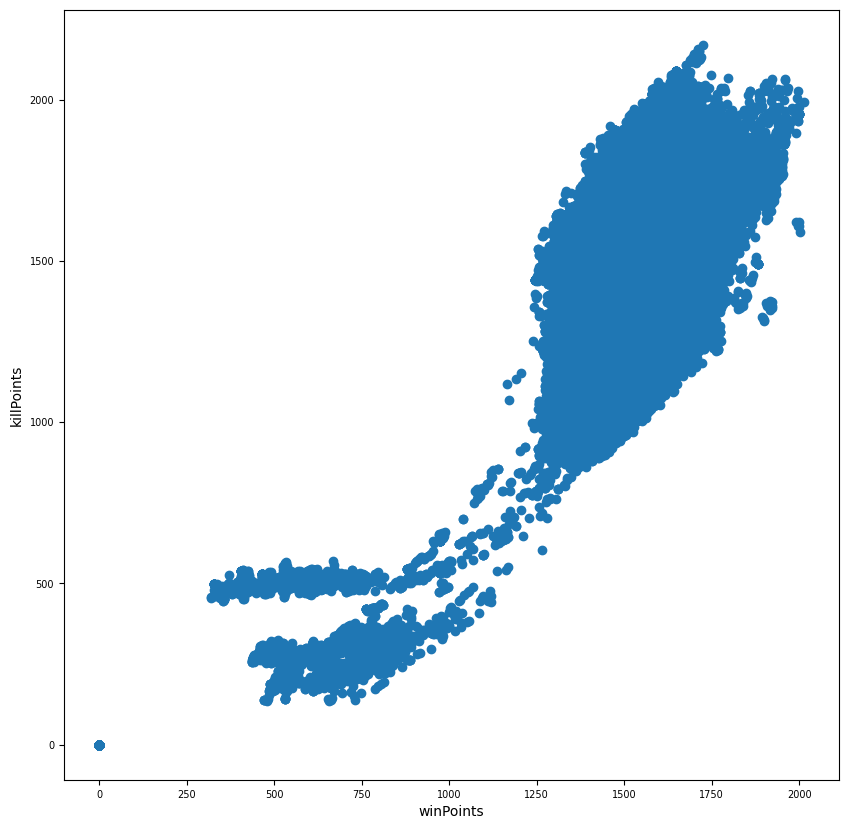

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(train_data['winPoints'],train_data['killPoints'])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('winPoints')
plt.ylabel('killPoints')
plt.show()

In [18]:
# 주어진 컬럼들로 이루어진 데이터프레임 생성
selected_columns = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'winPlacePerc']
df_cut = train_data[selected_columns].copy()

# 결과 확인
df_cut.head(10)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,winPlacePerc
0,0,0,0.000,0,0,0,60,0.4444
1,0,0,91.470,0,0,0,57,0.6400
2,1,0,68.000,0,0,0,47,0.7755
3,0,0,32.900,0,0,0,75,0.1667
4,0,0,100.000,0,0,0,45,0.1875
5,0,0,100.000,1,1,0,44,0.0370
6,0,0,0.000,0,0,0,96,0.0000
7,0,0,8.538,0,0,0,48,0.7368
8,0,0,51.600,0,0,0,64,0.3704
9,0,0,37.270,0,0,0,74,0.2143


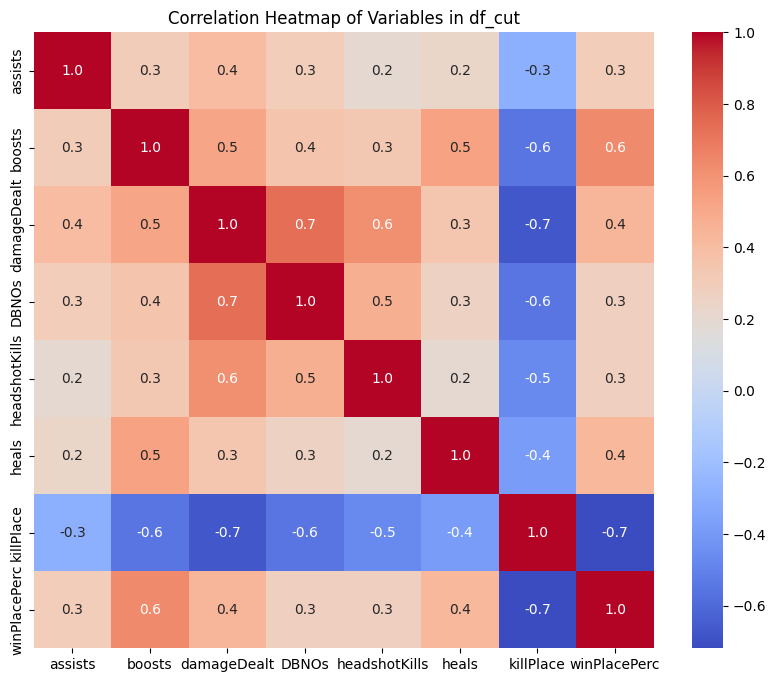

In [19]:
# 상관관계 행렬 계산
correlation_matrix = df_cut.corr()

# Heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap of Variables in df_cut')
plt.show()

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.scatterplot(data = df_cut, x = "winPlacePerc", y='assists')
plt.xlabel('winPlacePerc', fontsize=10)
plt.ylabel('assists', fontsize=10)

plt.subplot(3, 3, 2)
sns.scatterplot(data = df_cut, x = "winPlacePerc", y='boosts')
plt.xlabel('winPlacePerc', fontsize=10)
plt.ylabel('boosts', fontsize=10)

plt.subplot(3, 3, 3)
sns.scatterplot(data = df_cut, x = "winPlacePerc", y='damageDealt')
plt.xlabel('winPlacePerc', fontsize=10)
plt.ylabel('damageDealt', fontsize=10)

plt.subplot(3, 3, 4)
sns.scatterplot(data = df_cut, x = "winPlacePerc", y='DBNOs')
plt.xlabel('winPlacePerc', fontsize=10)
plt.ylabel('DBNOs', fontsize=10)

plt.subplot(3, 3, 5)
sns.scatterplot(data = df_cut, x = "winPlacePerc", y='headshotKills')
plt.xlabel('winPlacePerc', fontsize=10)
plt.ylabel('headshotKills', fontsize=10)

plt.subplot(3, 3, 6)
sns.scatterplot(data = df_cut, x = "winPlacePerc", y='heals')
plt.xlabel('winPlacePerc', fontsize=10)
plt.ylabel('heals', fontsize=10)

plt.subplot(3, 3, 7)
sns.scatterplot(data = df_cut, x = "winPlacePerc", y='killPlace')
plt.xlabel('winPlacePerc', fontsize=10)
plt.ylabel('killPlace', fontsize=10)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


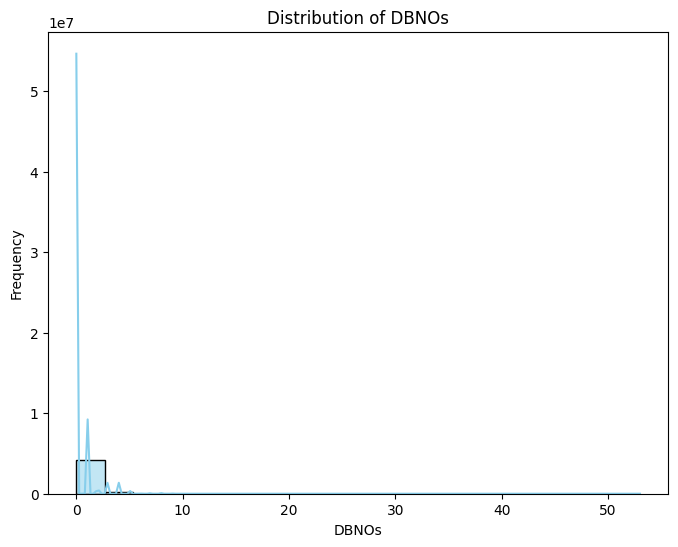

In [21]:
# DBNOs 컬럼의 분포를 시각화하기 위해 히스토그램 그리기
plt.figure(figsize=(8, 6))
sns.histplot(df_cut['DBNOs'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of DBNOs')
plt.xlabel('DBNOs')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


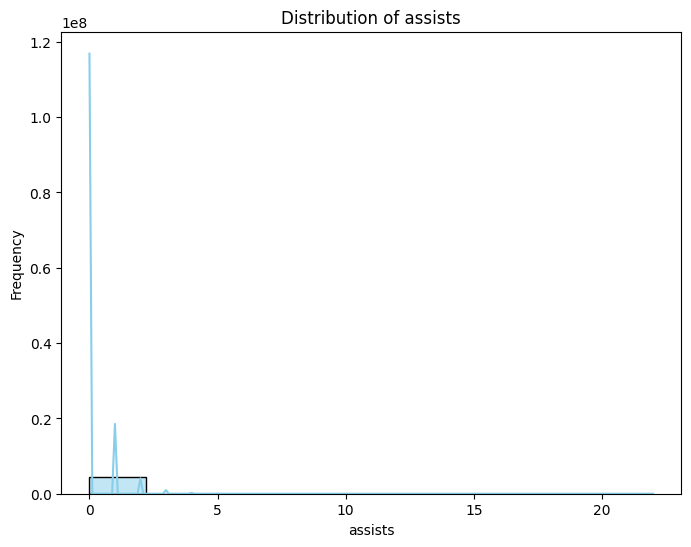

In [22]:
# assists 컬럼의 분포를 시각화하기 위해 히스토그램 그리기
plt.figure(figsize=(8, 6))
sns.histplot(df_cut['assists'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of assists')
plt.xlabel('assists')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


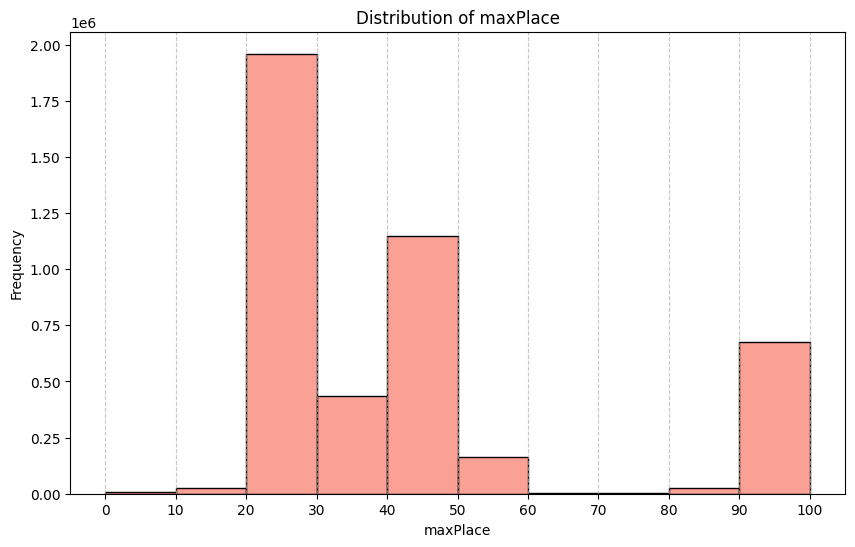

In [23]:
# maxPlace 컬럼의 분포를 시각화하기 위해 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(train_data['maxPlace'], bins=range(0, int(train_data['maxPlace'].max()) + 10, 10), color='salmon')
plt.title('Distribution of maxPlace')
plt.xlabel('maxPlace')
plt.ylabel('Frequency')
plt.xticks(range(0, int(train_data['maxPlace'].max()) + 10, 10))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## assists : 플레이어 본인이 아닌 팀원에 의해 죽었지만, 플레이어의 데미지 지분이 가장 높은 적의 수

플레이어가 가한 데미지 지분이 가장 높은 적이 많을수록 (but, 플레이어가 죽인건 아님) 승리 순위가 올라갈까?

jointplot 사용:두 변수의 관계와 데이터가 분산되어 있는 정도를 한눈에 파악하기 쉽다.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


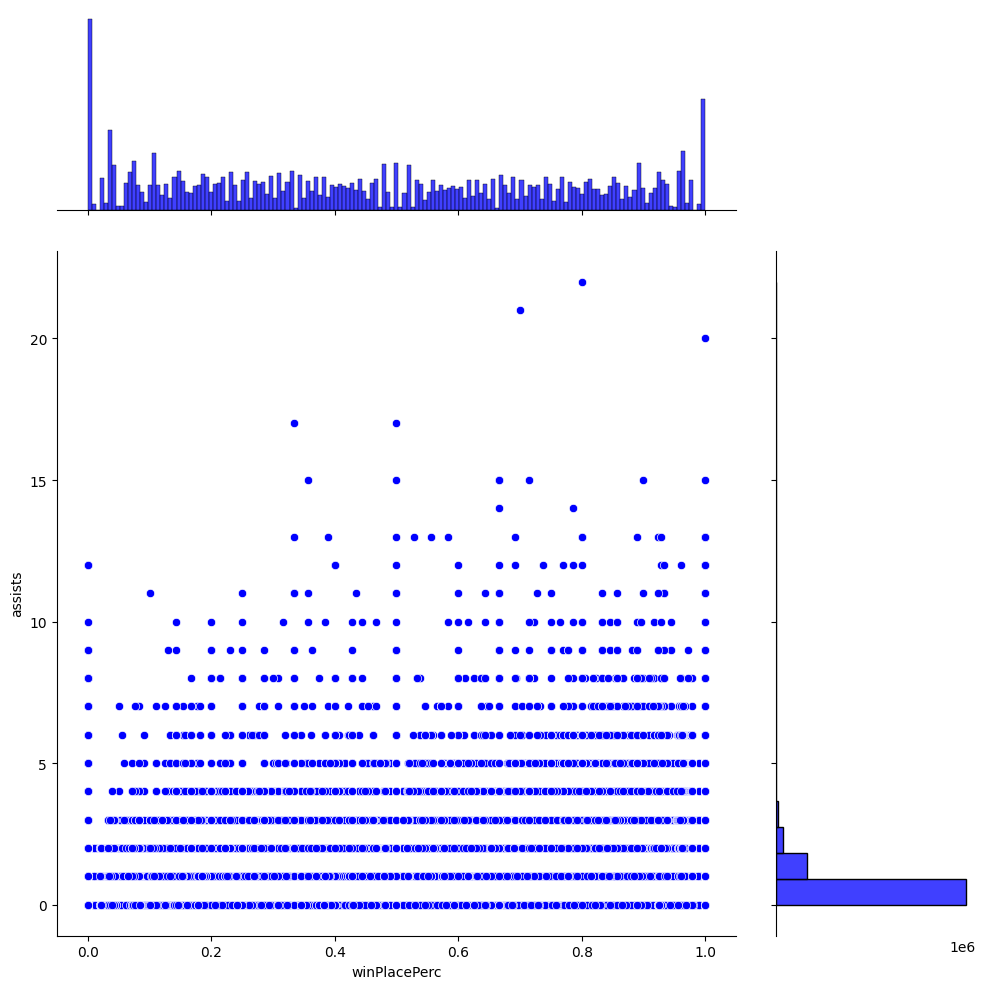

In [24]:
sns.jointplot(x="winPlacePerc", y="assists", data=df_cut, height = 10, ratio = 3, color="blue")
plt.show()

가운데 : 산점도

- assists가 증가할수록 winPlacePerc도 증가하는 것으로 보아, 둘 사이 양의 상관관계가 있음을 확인할 수 있다. 즉, 플레이어 본인이 죽인것은 아니지만 죽은 적에게 입힌 데미지 지분이 높을수록 승리 순위가 올라가는 것으로 해석할 수 있다.

우측 : assists의 히스토그램

- 대부분 0 ~ 5 사이의 값을 갖고 있으며, 그 중에서도 0~1사이가 가장 많았다.
- 죽은 적에게 입힌 데미지 지분이 낮음을 알 수 있다.

위쪽 : winPlacePerc의 히스토그램

- 대부분 고르게 분포하고 있으나, 0(경기 내 꼴등)과 1(경기 내 1등)이 각각 가장 많이 분포하고 있음을 알 수 있다.


## boosts : 사용된 부스트 아이템 수
## heals : 사용된 치유 아이템 수

-> 이 두개를 '아이템 사용'으로 묶어서 items 라는 새로운 피처를 만들어보았다.

아이템 사용이 승리 순위에 어떤 영향을 미치는지 알아보자

In [ ]:
# boosts와 heals를 묶어서 새로운 피쳐 생성
df_cut['items'] = df_cut['boosts'] + df_cut['heals']

# boosts, heals, items가 winPlacePerc와 어떤 관계를 갖고있는지 산점도로 각각 파악해보자
plt.figure(figsize = (15,10))
plt.subplot(3, 3, 1)
sns.scatterplot(data = df_cut, x='winPlacePerc', y='boosts')
plt.xlabel('winPlacePerc', fontsize=10)
plt.ylabel('boosts', fontsize=10)

plt.subplot(3, 3, 2)
sns.scatterplot(data = df_cut, x='winPlacePerc', y='heals')
plt.xlabel('winPlacePerc', fontsize=10)
plt.ylabel('heals', fontsize=10)

plt.subplot(3, 3, 3)
sns.scatterplot(data = df_cut, x='winPlacePerc', y='items')
plt.xlabel('winPlacePerc', fontsize=10)
plt.ylabel('items', fontsize=10)

plt.show()

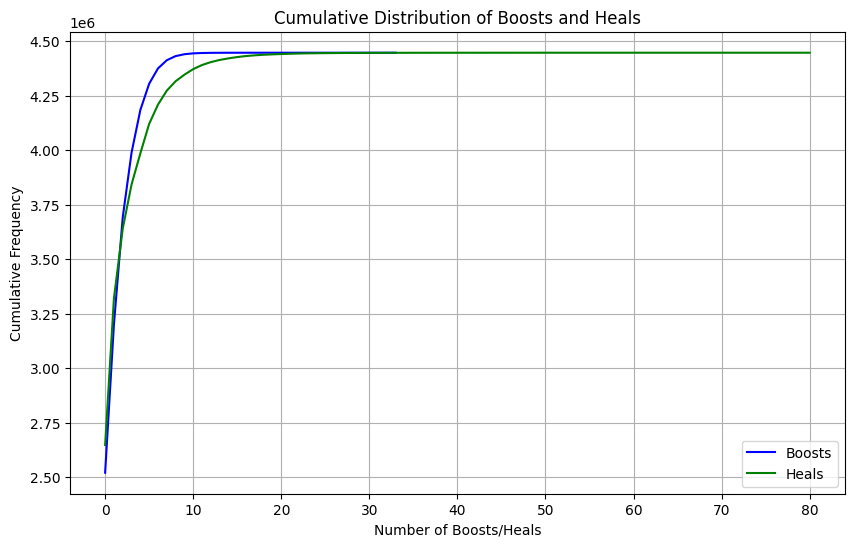

In [26]:
# boosts와 heals 변수의 값을 누적하기
boosts_cumulative = df_cut['boosts'].value_counts().sort_index().cumsum()
heals_cumulative = df_cut['heals'].value_counts().sort_index().cumsum()

# 누적 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.plot(boosts_cumulative.index, boosts_cumulative, label='Boosts', color='blue')
plt.plot(heals_cumulative.index, heals_cumulative, label='Heals', color='green')
plt.title('Cumulative Distribution of Boosts and Heals')
plt.xlabel('Number of Boosts/Heals')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.grid(True)
plt.show()

## killPlace : 죽인 적의 수에 따른 순위

In [ ]:
# scatter plot 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='killPlace', y='winPlacePerc', data=df_cut, alpha=0.5)
plt.title('Scatter Plot of killPlace and winPlacePerc')
plt.xlabel('killPlace')
plt.ylabel('winPlacePerc')

# 회귀선 추가
sns.regplot(x='killPlace', y='winPlacePerc', data=df_cut, scatter=False, color='red')

plt.grid(True)
plt.show()

- killPlace가 증가할수록 winPlacePerc는 감소하는 경향을 보였다.
- 즉, 죽인 적의 수에 따른 순위가 낮을수록(순위는 높은 숫자가 낮은것이므로) 이는 승리 순위에 악영향을 미치는 것으로 판단할 수 있다.
- 독립변수로서 의미있는 변수이다.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


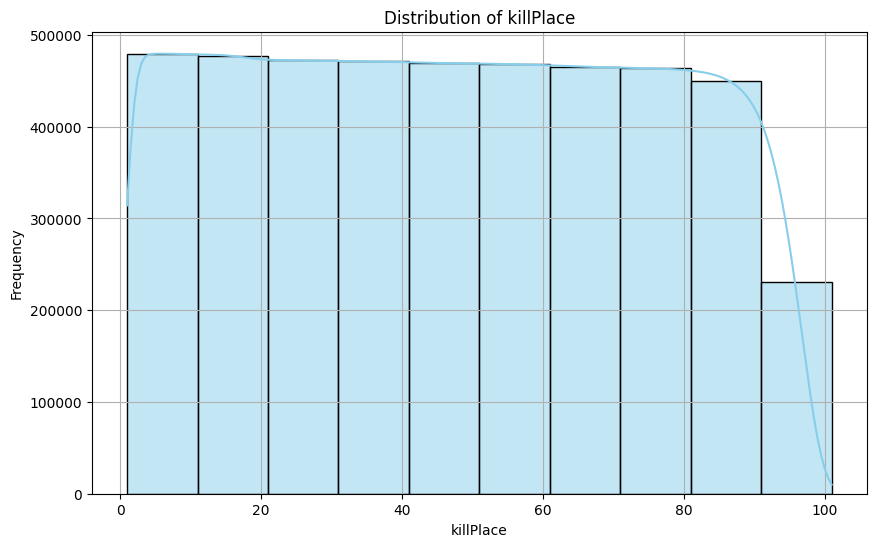

In [28]:
# killPlace의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df_cut['killPlace'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of killPlace')
plt.xlabel('killPlace')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- 최대인원이 100명이기 때문에 x축은 0위부터 100위까지로 되어있음
- 크진 않지만 미묘하게 점점 감소하는 형태이며, 90위에서 100위에 급격하게 분포가 줄어드는 것을 확인할 수 있었다.
- 가장 많은 순위는 0위부터 10위였다. (=잘하는 사람이 많다는 뜻?)

In [29]:
min_killPlace = df_cut['killPlace'].min()
max_killPlace = df_cut['killPlace'].max()

print("가장 작은 killPlace 값:", min_killPlace)
print("가장 큰 killPlace 값:", max_killPlace)

가장 작은 killPlace 값: 1
가장 큰 killPlace 값: 101


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


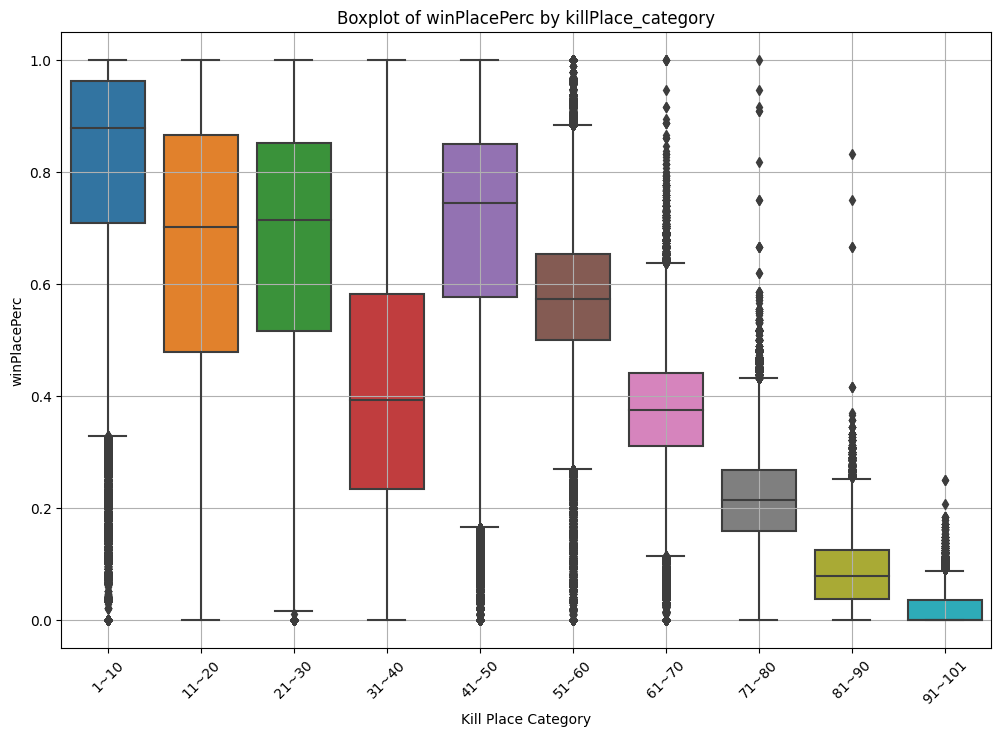

In [30]:
# killPlace_category 컬럼 생성
df_cut['killPlace_category'] = pd.cut(df_cut['killPlace'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101],
                                      labels=['1~10', '11~20', '21~30', '31~40', '41~50', '51~60', '61~70', '71~80',
                                              '81~90', '91~101'])

# boxplot 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(x='killPlace_category', y='winPlacePerc', data=df_cut)
plt.title('Boxplot of winPlacePerc by killPlace_category')
plt.xlabel('Kill Place Category')
plt.ylabel('winPlacePerc')
plt.grid(True)
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

## damageDealt : 적에게 입힌 총 데미지 량

In [31]:
min_damageDealt = df_cut['damageDealt'].min()
max_damageDealt = df_cut['damageDealt'].max()

print("가장 작은 damageDealt 값:", min_damageDealt)
print("가장 큰damageDealt 값:", max_damageDealt)

가장 작은 damageDealt 값: 0.0
가장 큰damageDealt 값: 6616.0


In [ ]:
# jointplot 그리기
plt.figure(figsize=(10, 8))
sns.jointplot(x='damageDealt', y='winPlacePerc', data=df_cut, kind='reg', height=8)
plt.xlabel('Damage Dealt')
plt.ylabel('winPlacePerc')
plt.title('Jointplot of damageDealt and winPlacePerc')
plt.grid(True)
plt.xlim(0, 7000)  # x축 범위 설정
plt.ylim(0, 1)  # y축 범위 설정
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

In [ ]:
## assists와 damageDealt 간의 관계 파악

# scatter plot 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(x='assists', y='damageDealt', data=df_cut, alpha=0.5)
plt.title('Scatter Plot of assists and damageDealt')
plt.xlabel('Assists')
plt.ylabel('Damage Dealt')
plt.grid(True)
plt.show()

## DBNOs : 기절시킨 적의 수

In [ ]:
min_DBNOs = df_cut['DBNOs'].min()
max_DBNOs = df_cut['DBNOs'].max()

print("가장 작은 DBNOs 값:", min_DBNOs)
print("가장 큰 DBNOs 값:", max_DBNOs)

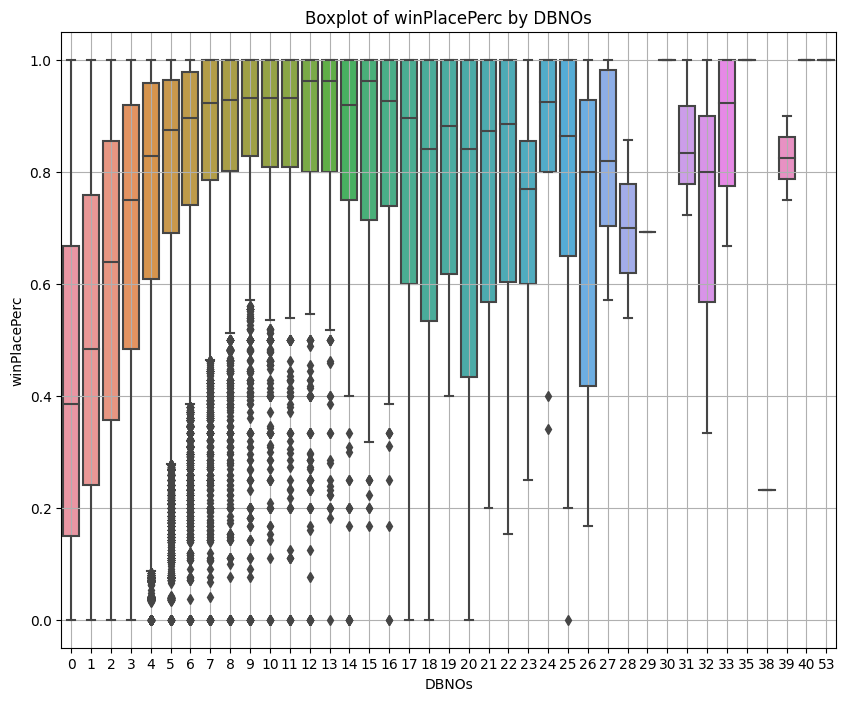

In [35]:
# boxplot 그리기
plt.figure(figsize=(10, 8))
sns.boxplot(x='DBNOs', y='winPlacePerc', data=df_cut)
plt.title('Boxplot of winPlacePerc by DBNOs')
plt.xlabel('DBNOs')
plt.ylabel('winPlacePerc')
plt.grid(True)
plt.show()

## headshotKills : 헤드샷으로 죽인 적의 수

In [ ]:
# headshotKills와 winPlacePerc 간의 scatter plot 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(x='headshotKills', y='winPlacePerc', data=df_cut, alpha=0.5)
plt.title('Scatter Plot of winPlacePerc by headshotKills')
plt.xlabel('headshotKills')
plt.ylabel('winPlacePerc')
plt.grid(True)
plt.show()

## damageDealt 분산팽창요인 파악

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


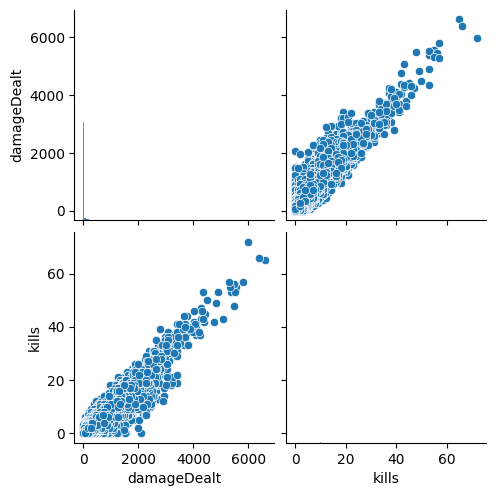

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## items와 damageDealt의 scatterplot으로 
sns.pairplot(train_data[['damageDealt', 'kills']])

In [ ]:
## vif
y, X = dmatrices('winPlacePerc ~ ', train_data, return_type)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 필요 없는 컬럼 삭제

제거할 컬럼 : killPoints, rankPoints, winPoints, numGroups, maxPlace
roadKills, teamKills, vehicleDestroys, GroupID, matchID


In [39]:
columns_to_drop = ['killPoints', 'rankPoints', 'winPoints', 'numGroups', 
                   'maxPlace', 'roadKills', 'teamKills', 'vehicleDestroys', 
                   'groupId', 'matchId']

train_data.drop(columns=columns_to_drop, inplace=True)

In [40]:
train_data.head(10)

,Id,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,matchType,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPlacePerc
0,7f96b2f878858a,0,0,0.000,0,0,0,60,0,0,0.00,1306,squad-fpp,0,0.0000,0.00,244.80,1,0.4444
1,eef90569b9d03c,0,0,91.470,0,0,0,57,0,0,0.00,1777,squad-fpp,0,0.0045,11.04,1434.00,5,0.6400
2,1eaf90ac73de72,1,0,68.000,0,0,0,47,0,0,0.00,1318,duo,0,0.0000,0.00,161.80,2,0.7755
3,4616d365dd2853,0,0,32.900,0,0,0,75,0,0,0.00,1436,squad-fpp,0,0.0000,0.00,202.70,3,0.1667
4,315c96c26c9aac,0,0,100.000,0,0,0,45,1,1,58.53,1424,solo-fpp,0,0.0000,0.00,49.75,2,0.1875
5,ff79c12f326506,0,0,100.000,1,1,0,44,1,1,18.44,1395,squad-fpp,0,0.0000,0.00,34.70,1,0.0370
6,95959be0e21ca3,0,0,0.000,0,0,0,96,0,0,0.00,1316,squad-fpp,0,0.0000,0.00,13.50,1,0.0000
7,311b84c6ff4390,0,0,8.538,0,0,0,48,0,0,0.00,1967,solo-fpp,0,2004.0000,0.00,1089.00,6,0.7368
8,1a68204ccf9891,0,0,51.600,0,0,0,64,0,0,0.00,1375,squad,0,0.0000,0.00,799.90,4,0.3704
9,e5bb5a43587253,0,0,37.270,0,0,0,74,0,0,0.00,1930,squad,0,0.0000,0.00,65.67,1,0.2143


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속변수 제외한 독립변수들만 선택
X = train_data.drop(columns=['winPlacePerc'])

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''